In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
labelEncoder = { "butterfly": 0, "cat": 1, "chicken": 2, "cow": 3, "dog": 4, "elephant": 5, "horse": 6, "sheep": 7, "spider": 8, "squirrel": 9}
classes = ['butterfly','cat','chicken','cow','dog','elephant','horse','sheep','spider','squirrel']
data = []
labels = []
#create an already resized and normalized dataset
#https://stackoverflow.com/questions/56569342/detecting-corrupt-images-in-tensorflow
for className in classes:
  os.chdir("/content/drive/My Drive/animals/{}".format(className))
  img_dir = "/content/drive/My Drive/animals/{}".format(className)
  files = os.listdir(img_dir)
  index = -1
  for f1 in files:
    index +=1
    if index == 100: 
      break
    print(className,index)  
    img = cv2.imread(f1)
    img = cv2.resize(img,(180,180))
    img = img.astype('float32')
    img /= 255.0
    data.append(img)
    #([1]) instead of (1) so our final tensor has dimensions of (numLabels,1) and not (numLabels,)
    labels.append([labelEncoder[className]])

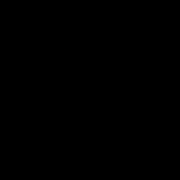

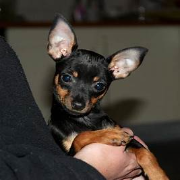

1000

In [ ]:
cv2_imshow(data[420])
cv2_imshow(data[420]*255.0)
len(data)

In [ ]:
data = tf.constant(data)
labels = tf.constant(labels)

In [ ]:
model = Sequential([

    layers.Conv2D(filters= 64, kernel_size=3, padding='same',activation='relu', input_shape=(180, 180, 3)),
    layers.Conv2D(filters= 64, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='same'),

    layers.Conv2D(filters= 128, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 128, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='same'),

    layers.Conv2D(filters= 256, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 256, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 256, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='same'),

    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='same'),

    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='same'),

    layers.Flatten(),
    layers.Dense(units=4096,activation='relu'),
    layers.Dense(units=4096,activation='relu'),
    layers.Dense(units=10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.summary()

In [ ]:
model_checkpoint_callback  = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/My Drive/DMT", monitor='accuracy', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None
)

epochs = 15
history = model.fit(
  x=data,
  y=labels,
  epochs=epochs,
  callbacks = [model_checkpoint_callback]
)


In [ ]:
os.chdir("/content/drive/My Drive")
model.save('DMT4.h5')